<a href="https://colab.research.google.com/github/edso2103/Cuadernos/blob/main/Primer_Parcial_HPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="200" height="200">
</img>
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> HPC Introducción 
<br>
<i><b>Estudiantes:</b></i> <br>Edna Sofía Orjuela Puentes,<br>Kevin Fabian Chepe Astudillo
<br>
<i><b>Tema:</b></i> Primer Parcial
<br>
01/09/22
<br>
</FONT>
</p>

#<FONT FACE="times new roman" SIZE=4> **Resumen:** El siguiente cuaderno, tiene como propósito realizar un análisis exploratorio de un dataframe de ventas de 19 productos. Este dataframe se construirá a partir de 12 datasets, correspondientes a los meses, de enero a diciembre del 2019.

<FONT FACE="times new roman" SIZE=4> **Dataset:**
- Ventas_April_2019.csv
- Ventas_August_2019.csv
- Ventas_December_2019.csv
- Ventas_Febraury_2019.csv
- Ventas_January_2019.csv
- Ventas_July_2019.csv
- Ventas_June_2019.csv
- Ventas_March_2019.csv
- Ventas_May_2019.csv
- Ventas_November_2019.csv
- Ventas_October_2019.csv
- Ventas_September_2019.csv

#<FONT FACE="times new roman" SIZE=4> **1. Agrupe cada mes de ventas en un solo CSV (‘ventas2019.csv’) con índice ‘ID Orden’**

<FONT FACE="times new roman" SIZE=4> **Primero:** Se importan las bibliotecas

In [ ]:
import pandas as pd            #Crear dataframe
import numpy as np             #Hijo de EIGEN
import seaborn as sns          #Visualizar datos
import matplotlib.pyplot as plt       #Graficar datos

<FONT FACE="times new roman" SIZE=4> **Segundo:** Se cargan los datasets

In [ ]:
df_abril=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_April_2019.csv')
df_agosto=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_August_2019.csv')
df_diciembre=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_December_2019.csv')
df_febrero=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_February_2019.csv')
df_enero=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_January_2019.csv')
df_julio=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_July_2019.csv')
df_junio=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_June_2019.csv')
df_marzo=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_March_2019.csv')
df_mayo=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_May_2019.csv')
df_noviembre=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_November_2019.csv')
df_octubre=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_October_2019.csv')
df_septiembre=pd.read_csv('https://raw.githubusercontent.com/edso2103/Datasets/main/Ventas_September_2019.csv')

<FONT FACE="times new roman" SIZE=4> **Tercero:** Se agrupan los 12 datasets en un dataset, 'ventas2019', y se ajusta el indice con la columna, 'ID Orde'

In [ ]:
ventas2019 = pd.concat([df_enero,df_febrero,df_marzo,df_abril,df_mayo,df_junio,df_julio,df_agosto,df_septiembre,df_octubre,df_noviembre,df_diciembre])
ventas2019=ventas2019.set_index('ID Orden')
ventas2019

,Producto,Cantidad Ordenada,Precio Unitario,Fecha,Dirección de Compra
ID Orden,,,,,
141234,Audifonos Apple Airpods,1,499900,01/25/19 13:51,"177 calle Jimenez, Cali, VC"
141235,Parlante Google HomeMini,1,159900,01/12/19 23:58,"732 calle 9na, Cúcuta, NS"
141236,Cable de Carga Lightning,1,64900,01/15/19 21:42,"887 calle Kennedy, Medellin, AN"
141237,Parlante Google HomeMini,1,159900,01/27/19 11:39,"641 calle 5ta, Bucaramanga, SA"
141238,Samsung Galaxy A302,1,649900,01/14/19 17:13,"379 calle 2da, Medellin, AN"
...,...,...,...,...,...
299477,Audifonos Bose SoundSport,1,399900,12/01/19 10:38,"421 calle Autopista Norte, Armenia, QU"
299478,Cable de Carga Lightning,1,64900,12/27/19 05:23,"679 calle 4ta, Bucaramanga, SA"
299479,Cable de Carga USB-C P/O,1,46900,12/15/19 12:41,"707 calle Norte, Medellin, AN"


In [ ]:
# Se guarda el tamaño del dataset original en la variable size_o,
# para usarla posteriormente

size_o=ventas2019.shape
print(size_o)

(165203, 5)


#<FONT FACE="times new roman" SIZE=4> **2.- Agregar columnas Mes, Ciudad (Departamento) y Ventas**

<FONT FACE="times new roman" SIZE=4> **Primero:** Se identifican las columnas actuales'

In [ ]:
ventas2019.columns

Index(['Producto ', ' Cantidad Ordenada', 'Precio Unitario ', 'Fecha',
       'Dirección de Compra'],
      dtype='object')

<FONT FACE="times new roman" SIZE=4> **Segundo:** Se crea la columna 'Mes' y se le agregan los meses de la columna 'Fecha'.Además, se convierte el tipo de dato a entero, para luego poder manipular esta columna.

In [ ]:
ventas2019['Mes']=((ventas2019['Fecha'].str[:2]).apply(pd.to_numeric, errors='coerce').fillna(0)).astype(int)
ventas2019

,Producto,Cantidad Ordenada,Precio Unitario,Fecha,Dirección de Compra,Mes
ID Orden,,,,,,
141234,Audifonos Apple Airpods,1,499900,01/25/19 13:51,"177 calle Jimenez, Cali, VC",1
141235,Parlante Google HomeMini,1,159900,01/12/19 23:58,"732 calle 9na, Cúcuta, NS",1
141236,Cable de Carga Lightning,1,64900,01/15/19 21:42,"887 calle Kennedy, Medellin, AN",1
141237,Parlante Google HomeMini,1,159900,01/27/19 11:39,"641 calle 5ta, Bucaramanga, SA",1
141238,Samsung Galaxy A302,1,649900,01/14/19 17:13,"379 calle 2da, Medellin, AN",1
...,...,...,...,...,...,...
299477,Audifonos Bose SoundSport,1,399900,12/01/19 10:38,"421 calle Autopista Norte, Armenia, QU",12
299478,Cable de Carga Lightning,1,64900,12/27/19 05:23,"679 calle 4ta, Bucaramanga, SA",12
299479,Cable de Carga USB-C P/O,1,46900,12/15/19 12:41,"707 calle Norte, Medellin, AN",12


<FONT FACE="times new roman" SIZE=4> **Tercero:** Se realiza una función Ciudad, para que fila por fila de la columna 'Dirección de Compra, se dividan las cadenas por el separador ',' para luego obtener la segunda y tercera cadena, que corresponden a la Ciudad(Departamento). El resultado se agrega a una nueva columna, 'Ciudad'.

In [ ]:
def Ciudad(fila):
  try:
    return fila.split(',')[1].lstrip()+" "+fila.split(',')[2]
  except: 
    pass
ventas2019['Ciudad']=ventas2019['Dirección de Compra'].apply(Ciudad)
ventas2019

,Producto,Cantidad Ordenada,Precio Unitario,Fecha,Dirección de Compra,Mes,Ciudad
ID Orden,,,,,,,
141234,Audifonos Apple Airpods,1,499900,01/25/19 13:51,"177 calle Jimenez, Cali, VC",1,Cali VC
141235,Parlante Google HomeMini,1,159900,01/12/19 23:58,"732 calle 9na, Cúcuta, NS",1,Cúcuta NS
141236,Cable de Carga Lightning,1,64900,01/15/19 21:42,"887 calle Kennedy, Medellin, AN",1,Medellin AN
141237,Parlante Google HomeMini,1,159900,01/27/19 11:39,"641 calle 5ta, Bucaramanga, SA",1,Bucaramanga SA
141238,Samsung Galaxy A302,1,649900,01/14/19 17:13,"379 calle 2da, Medellin, AN",1,Medellin AN
...,...,...,...,...,...,...,...
299477,Audifonos Bose SoundSport,1,399900,12/01/19 10:38,"421 calle Autopista Norte, Armenia, QU",12,Armenia QU
299478,Cable de Carga Lightning,1,64900,12/27/19 05:23,"679 calle 4ta, Bucaramanga, SA",12,Bucaramanga SA
299479,Cable de Carga USB-C P/O,1,46900,12/15/19 12:41,"707 calle Norte, Medellin, AN",12,Medellin AN


<FONT FACE="times new roman" SIZE=4> **Cuarto:** Se convierten las columnas de Object a Int, con el objetivo de poder operarlas, específicamente, multiplicarlas para crear la columna, 'Ventas'.

In [ ]:
ventas2019['Precio Unitario ']=(ventas2019['Precio Unitario '].apply(pd.to_numeric, errors='coerce').fillna(0)).astype(int)
ventas2019[' Cantidad Ordenada']=(ventas2019[' Cantidad Ordenada'].apply(pd.to_numeric, errors='coerce').fillna(0)).astype(int)
ventas2019['Ventas']=ventas2019['Precio Unitario ']*ventas2019[' Cantidad Ordenada']
ventas2019

,Producto,Cantidad Ordenada,Precio Unitario,Fecha,Dirección de Compra,Mes,Ciudad,Ventas
ID Orden,,,,,,,,
141234,Audifonos Apple Airpods,1,499900,01/25/19 13:51,"177 calle Jimenez, Cali, VC",1,Cali VC,499900
141235,Parlante Google HomeMini,1,159900,01/12/19 23:58,"732 calle 9na, Cúcuta, NS",1,Cúcuta NS,159900
141236,Cable de Carga Lightning,1,64900,01/15/19 21:42,"887 calle Kennedy, Medellin, AN",1,Medellin AN,64900
141237,Parlante Google HomeMini,1,159900,01/27/19 11:39,"641 calle 5ta, Bucaramanga, SA",1,Bucaramanga SA,159900
141238,Samsung Galaxy A302,1,649900,01/14/19 17:13,"379 calle 2da, Medellin, AN",1,Medellin AN,649900
...,...,...,...,...,...,...,...,...
299477,Audifonos Bose SoundSport,1,399900,12/01/19 10:38,"421 calle Autopista Norte, Armenia, QU",12,Armenia QU,399900
299478,Cable de Carga Lightning,1,64900,12/27/19 05:23,"679 calle 4ta, Bucaramanga, SA",12,Bucaramanga SA,64900
299479,Cable de Carga USB-C P/O,1,46900,12/15/19 12:41,"707 calle Norte, Medellin, AN",12,Medellin AN,46900


#<FONT FACE="times new roman" SIZE=4> **3.- Limpieza de valores NaN**

<FONT FACE="times new roman" SIZE=4> **Primero:** Listar la cantidad de valores NaN por columna

In [ ]:
ventas2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165203 entries, 141234 to 299481
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Producto             164707 non-null  object
 1    Cantidad Ordenada   165203 non-null  int64 
 2   Precio Unitario      165203 non-null  int64 
 3   Fecha                164707 non-null  object
 4   Dirección de Compra  164707 non-null  object
 5   Mes                  165203 non-null  int64 
 6   Ciudad               164404 non-null  object
 7   Ventas               165203 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 11.3+ MB


<FONT FACE="times new roman" SIZE=4> **Segundo:** Eliminar los valores NaN y duplicados del dataset

In [ ]:
ventas2019=ventas2019.dropna() #valores nulos

In [ ]:
ventas2019=ventas2019.drop_duplicates()#valores duplicados

<FONT FACE="times new roman" SIZE=4> **Tercero:** ¿Cuántas filas con datos incompletos y duplicados se han eliminado?

In [ ]:
ventas2019.info() #Se comprueba

<class 'pandas.core.frame.DataFrame'>
Index: 164193 entries, 141234 to 299481
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Producto             164193 non-null  object
 1    Cantidad Ordenada   164193 non-null  int64 
 2   Precio Unitario      164193 non-null  int64 
 3   Fecha                164193 non-null  object
 4   Dirección de Compra  164193 non-null  object
 5   Mes                  164193 non-null  int64 
 6   Ciudad               164193 non-null  object
 7   Ventas               164193 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 11.3+ MB


In [ ]:
valores_eliminados= size_o[0]-(ventas2019.shape[0])
print("Se han eliminado",valores_eliminados,"datos duplicados e incompletos")

Se han eliminado 1010 datos duplicados e incompletos


In [ ]:
#Se borra la columna Producto, se considera irrelevante, además no cuenta con valores
ventas2019.drop(ventas2019[ventas2019['Producto ']=='Producto '].index,inplace=True)

In [ ]:
ventas2019['Producto '].unique()

array(['Audifonos Apple Airpods', 'Parlante Google HomeMini',
       'Cable de Carga Lightning', 'Samsung Galaxy A302',
       'AAA Batteries (4-pack)', 'Multiolla Oster 0150 Negra PE',
       'Cable de Carga USB-C P/O', 'AA Batteries (4-pack)',
       'Horno Microondas 0.8P Samsung AGE',
       'Freidora Saludable B&D 3.5 Litros', 'Xiaomi REDMI Note 8',
       'Motorola G8 Plus Red', 'Audifonos Bose SoundSport',
       'Freidora Air Fryer Kalley K-MAF25',
       'Asus VivoBook X420FA-BV Laptop',
       'Macbook Air MQD32E/A 128GB 13.3"', 'LG Lavadora 19Kg Inv WT19',
       'LG Secadora Carga Frontal', 'Samsung Galaxy A20S'], dtype=object)

#<FONT FACE="times new roman" SIZE=4> **4.- Elaborar una gráfica de “Ventas por Mes (año 2019)”**

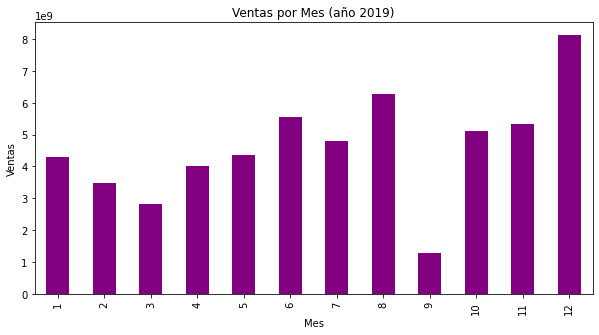

In [ ]:
fig=plt.figure(figsize=(10,5))
#Se agrupan las ventas por mes
dfg=ventas2019.groupby('Mes')['Ventas'].sum()
plt.title("Ventas por Mes (año 2019)")
dfg.plot(kind='bar',xlabel='Mes',ylabel='Ventas',color='purple')
plt.show()

#<FONT FACE="times new roman" SIZE=4> **5.- ¿Cuál fue el mejor mes en ventas del año 2019? Explique**


In [ ]:
ventas2019[(ventas2019.Mes==12)]['Ventas'].sum()

8113461773

<FONT FACE="times new roman" SIZE=4> Según la gráfica anterior, el mes con mayor ventas corresponde al 12, es decir Diciembre, con un total de 8.113.461.773 ventas. El mes de diciembre fue en el que más se vendió, porque es el mes feriado donde se hacen más regalos por motivo de navidades.

#<FONT FACE="times new roman" SIZE=4> **6.- ¿Cuál fue el peor mes en ventas del año 2019? Explique**


In [ ]:
ventas2019[(ventas2019.Mes==9)]['Ventas'].sum()

1286982234

<FONT FACE="times new roman" SIZE=4> Según la gráfica anterior, el mes con menor ventas corresponde al 9, es decir Septiembre, con un total de 1.286.982.234 ventas. El mes de septiembre es el mes con menos ventas porque los productos que se comercializan son mayormente de tecnología y septiembre es donde se suele comprar mayormente ropa y textiles antes de dicimebre, ya que los precios son un poco más bajos. 

#<FONT FACE="times new roman" SIZE=4> **7.- Elabore una gráfica de "Ventas por Ciudad (año 2019)"**

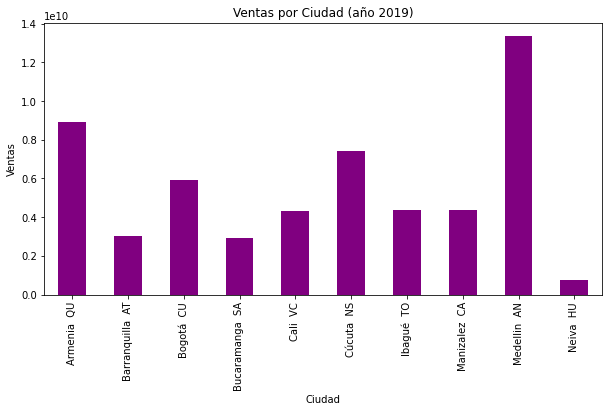

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.title("Ventas por Ciudad (año 2019)")
dfg=ventas2019.groupby('Ciudad')['Ventas'].sum()
dfg.plot(kind='bar',xlabel='Ciudad',ylabel='Ventas',color='purple')
plt.show()

#<FONT FACE="times new roman" SIZE=4> **8.- ¿Cuál fue la ciudad que más productos vendió? Explique**

In [ ]:
ventas2019[(ventas2019.Ciudad=='Medellin  AN')]['Ventas'].sum()

13378861427

<FONT FACE="times new roman" SIZE=4> Según la gráfica anterior, la ciudad con mayor número de ventas corresponde a Medellin, con un total de 13.378.861.427 ventas. La ciudad de medellín es unos de los centros de ventas más grandes del pais, gracias a sus finanzas consistentes y buena administración.

#<FONT FACE="times new roman" SIZE=4> **9.- Elabore una gráfica de “Cantidad de Productos Vendidos (año 2019)”**

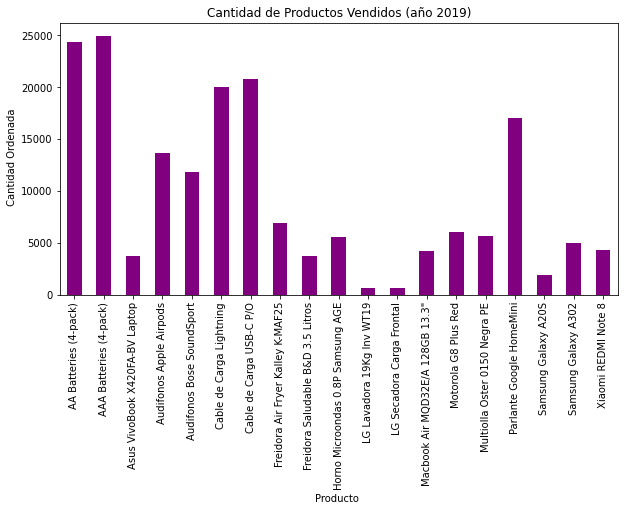

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.title("Cantidad de Productos Vendidos (año 2019)")
dfg=ventas2019.groupby('Producto ')[' Cantidad Ordenada'].sum()
dfg.plot(kind='bar',xlabel='Producto ',ylabel=' Cantidad Ordenada',color='purple')
plt.xticks(rotation=90)
plt.show()

#<FONT FACE="times new roman" SIZE=4> **10.- ¿Cuál es el producto más vendido?**


In [ ]:
ventas2019[(ventas2019['Producto ']=='AAA Batteries (4-pack)')][' Cantidad Ordenada'].sum()

24954

<FONT FACE="times new roman" SIZE=4>En la gráfica anterior se observa que el producto más pedido fue 'AAA Batteries (4-pack)', con una cantidad ordenada de 24954


#<FONT FACE="times new roman" SIZE=4> **11.- ¿Por qué piensa que es el más vendido?**

##<FONT FACE="times new roman" SIZE=4> Las pilas son el producto que la mayoría de aparatos electrónicos utilizan, y que no requieren alto consumo, además son de bajo costo, por ende es lo más comprado.

#<FONT FACE="times new roman" SIZE=4> **12.- Dada las ventas por productos, elabore una gráfica sobre el punto anterior el precio promedio de los productos según el ejemplo**

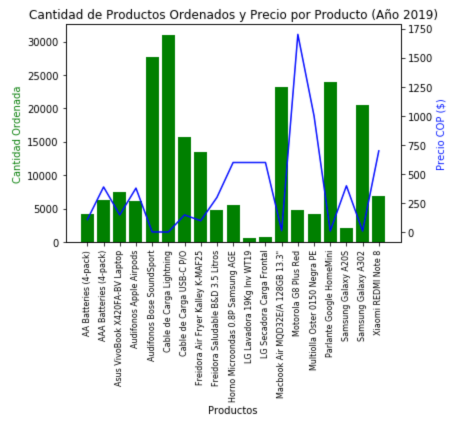

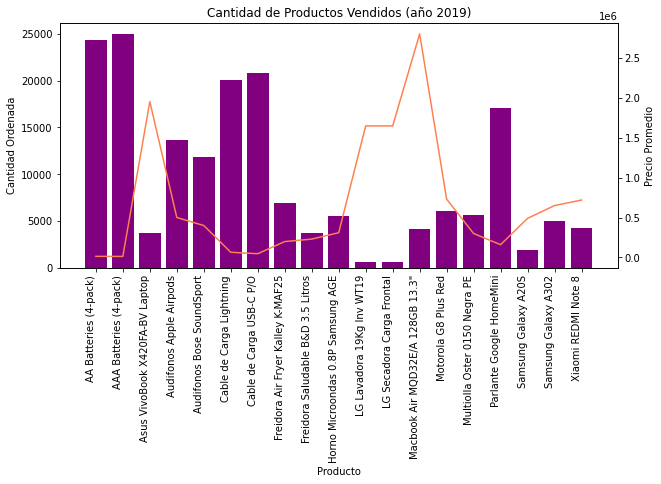

In [ ]:
dfg2=ventas2019.groupby('Producto ')['Precio Unitario '].mean()
fig,ax=plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(dfg.index,dfg.values,color='purple')
ax.set_xlabel('Producto')
ax.set_ylabel('Cantidad Ordenada')
ax2.plot(dfg.index,dfg2.values,color='coral')
ax2.set_ylabel('Precio Promedio')
plt.title("Cantidad de Productos Vendidos (año 2019)")
fig.autofmt_xdate(rotation=90)

#<FONT FACE="times new roman" SIZE=4> **13.- Describa al menos 5 conclusiones sobre la gráfica del punto 12.**

##<FONT FACE="times new roman" SIZE=4> 
*   El precio de las pilas no varía ya que son rentables y sus ventas son activas.
* Los portátiles de la marca ASUS tiene un precio elevado y se vende poco y los MacBook Air tienen un precio aún más exorbitante.
*   Los cables de carga se venden mucho debido a su bajo costo.
*   Las lavadoras y secadoras no se venden mucho, pero su precio es tan elevado como el del MacBook Air.
*   Los celulares casi no se venden, pero se valorizan dependiendo la marca.


#<FONT FACE="times new roman" SIZE=4> **14.- ¿Cuál es el promedio, desviación, el valor máximo y mínimo de las Ventas en el dataset?**

In [ ]:
ventas2019.agg(['mean','std','min','max'])['Ventas']

mean    3.375278e+05
std     5.360208e+05
min     1.299000e+04
max     5.598000e+06
Name: Ventas, dtype: float64

<FONT FACE="times new roman" SIZE=4> 
* La mayor venta fue de 5.598000e+06
* La menor venta fue de 1.299000e+04
* La media fue de 3.375278e+05
* La desviación estandar fue de 5.360208e+05

#<FONT FACE="times new roman" SIZE=4> **15.- ¿Cuál es la proporción de ventas de la ciudad de Cúcuta en el año 2019?**

<FONT FACE="times new roman" SIZE=4> En cuanto a la proporción de ventas de Cúcuta, se puede observar que es alta, puesto que corresponde a la tercera ciudad con más ventas (7.409.419.532)

In [ ]:
ventas2019[(ventas2019.Ciudad=='Cúcuta  NS')]['Ventas'].sum()

7409419532

#<FONT FACE="times new roman" SIZE=4> **16.- Calcule el promedio y la desviación estándar de las Ventas, en:**
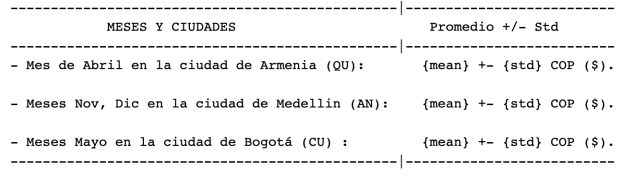

In [ ]:
primero=ventas2019.groupby(['Ciudad','Mes']).agg(['mean','std'])['Ventas'].loc['Armenia  QU'].iloc[2:3]
primero['Ciudad']='Armenia'
primero.insert(0,'Mes','Abril')
segundo=ventas2019.groupby(['Ciudad','Mes']).agg(['mean','std'])['Ventas'].loc['Medellin  AN'].iloc[10:12]
segundo['Ciudad']='Medellin'
segundo['Mes']='Noviembre','Diciembre'
tercero=ventas2019.groupby(['Ciudad','Mes']).agg(['mean','std'])['Ventas'].loc['Bogotá  CU'].iloc[4:5]
tercero['Ciudad']='Bogotá'
tercero['Mes']='Mayo'
primero=primero.set_index('Ciudad')
segundo=segundo.set_index('Ciudad')
tercero=tercero.set_index('Ciudad')
otras_ventas=pd.concat([primero,segundo,tercero])
otras_ventas

,Mes,mean,std
Ciudad,,,
Armenia,Abril,313845.331852,483535.056069
Medellin,Noviembre,338353.405083,520971.359900
Medellin,Diciembre,337543.964589,542846.295151
Bogotá,Mayo,317831.171510,506966.803439


<FONT FACE="times new roman" SIZE=4> 
* De la anterior tabla se puede observar que el promedio de ventas fue mayor para Medellín en el mes de Noviembre, mientras que el menor promedio de ventas fue en Armenia.
* Según la tabla, la desviación estándar fue mayor para Armenia en el mes de abril, razón por la que si se visualizan los datos de ese mes, se obtendrá que se encuentran más dispersos o alejados de la media, con respecto a las demás ciudades contenidas en esta tabla.

#<FONT FACE="times new roman" SIZE=4> **Conclusiones**
* Es importante realizar el análisis de los datos, dado a que pueden contener valores nulos o duplicados, que interfieran con la posterior manipulación de los datos.<br>  

* En cuanto al dataset, se observó que en el año 2019:
  * se realizaron mayores ventas en Medellín
  * en Neiva casi no se realizaron ventas
  * se realizaron mayores ventas en el mes de Diciembre
  * el mes con menores ventas fue Septiembre
  * el producto más pedido fueron las baterías triple A
  * el productor menos pedido fueron las lavadoras y las secadoras por su precio

#<FONT FACE="times new roman" SIZE=4> **Referencias**

*   https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
*   https://pandas.pydata.org/docs/user_guide/merging.html
*   https://seaborn.pydata.org/tutorial/categorical.html



